# Detecção de novidades utilizando LOF

In [1]:
#Bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

In [2]:
#Carregar dataset para treinamento
dataset = pd.read_excel("pzt2.xlsx", header=None)

display(dataset)

,0,1,2,3,4,5,6,7,8,9,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970
0,30000.0,162.179,162.080,162.019,162.019,162.019,162.069,162.069,162.118,162.019,...,186.107,186.107,186.163,186.051,186.051,186.265,186.321,186.265,186.051,186.016
1,30010.0,164.697,164.647,164.697,164.537,164.537,164.588,164.537,164.638,164.537,...,188.648,188.648,188.705,188.648,188.648,188.648,188.806,188.806,188.591,188.389
2,30020.0,167.906,167.906,167.906,167.957,167.906,167.957,167.906,168.009,167.744,...,191.525,191.525,191.684,191.684,191.684,191.684,191.684,191.684,191.467,191.367
3,30030.0,171.637,171.583,171.583,171.637,171.583,171.637,171.637,171.690,171.473,...,195.126,195.185,195.126,195.126,195.126,195.185,195.285,195.285,195.126,194.749
4,30040.0,174.364,174.364,174.364,174.364,174.141,174.197,174.141,174.252,174.197,...,200.095,200.033,200.095,200.095,200.095,200.095,200.254,200.095,200.033,199.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,69960.0,662.970,662.970,663.175,663.997,664.409,663.586,663.586,664.616,666.062,...,778.363,778.081,778.081,778.081,777.798,778.081,778.081,778.646,780.348,783.488
3996,69970.0,664.822,665.028,665.235,666.269,666.477,665.855,665.855,666.892,668.140,...,776.670,776.389,776.389,776.670,776.107,776.670,776.670,776.952,779.213,782.915
3997,69980.0,658.891,659.094,659.906,660.721,661.332,660.721,660.517,661.332,662.970,...,771.912,771.634,771.634,771.634,771.356,771.634,771.634,772.190,774.984,779.780
3998,69990.0,652.867,653.066,653.464,654.463,654.863,654.263,654.263,655.063,656.670,...,763.656,763.112,763.112,763.384,762.840,763.384,763.384,763.929,767.212,772.747


In [3]:
#Tratamento do dataset - Transpor dados
data = dataset.T

display(data)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,30000.000,30010.000,30020.000,30030.000,30040.000,30050.000,30060.000,30070.000,30080.000,30090.000,...,69910.000,69920.000,69930.000,69940.000,69950.000,69960.000,69970.000,69980.000,69990.000,70000.000
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [4]:
#Tratamento do dataset - Remover linha da frequencia e ruido
dataset_final = data.drop([0, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989], axis=0)

display(dataset_final)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
5,162.019,164.537,167.906,171.583,174.141,172.712,163.434,156.944,155.964,156.413,...,653.464,659.500,666.062,666.269,662.970,664.409,666.477,661.332,654.863,654.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [5]:
#Definindo dados de treinamento
X_train = dataset_final.iloc[0: 550]

display(X_train)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
5,162.019,164.537,167.906,171.583,174.141,172.712,163.434,156.944,155.964,156.413,...,653.464,659.500,666.062,666.269,662.970,664.409,666.477,661.332,654.863,654.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,189.317,195.933,202.873,184.963,174.307,173.046,173.986,175.325,177.500,179.997,...,784.923,773.864,763.112,761.214,760.403,756.109,752.919,755.309,764.474,782.058
547,188.979,195.872,202.740,184.786,174.364,172.882,173.825,175.271,177.500,179.942,...,784.636,773.864,762.840,760.673,760.133,755.575,752.391,754.511,763.384,780.348
548,189.200,195.872,202.873,184.786,174.420,173.101,173.986,175.325,177.554,180.156,...,784.923,774.144,763.112,761.214,760.673,756.109,753.184,755.309,764.201,781.772
549,188.979,195.749,202.873,185.026,174.307,172.991,173.825,175.325,177.395,179.942,...,785.499,774.984,763.656,761.214,760.673,756.376,753.184,755.309,764.201,780.917


In [6]:
#Definindo dados de teste
X_test = dataset_final.iloc[550: 660]

display(X_test)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
551,189.096,195.872,202.740,184.371,174.250,173.046,173.825,175.325,177.500,180.156,...,784.636,773.864,763.112,760.943,760.133,755.842,752.919,755.043,764.201,781.487
552,188.979,195.810,202.807,184.786,174.420,172.991,173.986,175.271,177.500,180.156,...,784.636,773.864,763.112,760.673,760.133,755.842,752.655,755.043,763.929,781.202
553,189.038,195.933,202.807,184.963,174.477,173.155,173.986,175.325,177.554,180.156,...,783.201,772.747,761.755,759.325,758.787,754.245,751.335,753.449,762.297,779.213
554,189.096,195.872,202.674,185.316,174.420,172.991,173.825,175.325,177.500,179.997,...,783.488,772.469,761.755,759.594,759.056,754.511,751.335,753.980,762.840,780.064
555,189.038,195.810,202.646,185.191,174.364,173.046,173.825,175.271,177.500,180.101,...,783.201,772.747,761.755,759.325,758.787,754.245,751.072,753.449,762.297,778.929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,208.772,211.891,191.490,183.538,183.172,184.353,185.141,187.012,189.023,190.505,...,820.083,821.026,817.891,811.385,798.976,781.487,764.474,751.335,743.253,739.916
657,208.871,211.789,191.905,183.825,183.287,184.353,185.084,186.852,189.023,190.665,...,821.026,822.286,819.142,812.308,800.170,782.629,765.567,752.391,744.286,740.683
658,208.938,211.928,191.905,183.766,183.287,184.353,185.141,187.012,189.023,190.723,...,820.397,821.340,818.516,811.692,799.573,782.058,765.020,751.862,743.769,740.171
659,208.341,211.887,192.081,183.834,183.180,184.248,184.980,186.852,188.863,190.564,...,821.340,822.918,820.711,814.470,803.472,786.076,768.588,754.511,745.322,741.196


In [7]:
#Definindo dados de dano
X_outliers = dataset_final.iloc[660: 2970]

display(X_outliers)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
661,166.940,169.590,173.226,176.950,179.447,170.780,160.324,157.815,158.669,159.576,...,663.381,672.123,676.154,676.368,677.009,670.860,659.500,655.263,656.066,658.891
662,166.518,169.429,172.955,176.510,179.050,170.550,160.376,157.799,158.556,159.417,...,662.355,671.070,675.089,675.089,675.727,669.811,658.689,654.663,655.263,657.880
663,166.358,169.055,172.576,176.289,178.823,170.840,160.480,157.520,158.395,159.306,...,661.128,669.602,674.026,674.026,674.451,669.811,658.689,654.063,654.463,656.871
664,166.198,168.895,172.414,175.959,178.480,170.671,160.088,157.355,158.121,158.986,...,660.313,668.766,673.391,673.391,673.391,669.602,658.689,653.863,653.863,656.267
665,165.936,168.682,172.360,175.959,178.253,170.671,160.140,157.405,158.170,159.035,...,660.313,668.348,672.968,673.179,673.179,669.602,658.689,653.863,653.863,656.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [8]:
#Ajustar o modelo para detecção de novidade (novelty = True)
clf = LocalOutlierFactor(n_neighbors=10, novelty=True, contamination=0.15).fit(X_train)

In [15]:
#Identificação da condição natural
y_pred_test = clf.predict(X_test)

n_inliers = y_pred_test[y_pred_test == 1].size

print("Inliers identificados: ", n_inliers)

Inliers identificados:  17


In [17]:
#Identificação de anomalia
y_pred_outliers = clf.predict(X_outliers)

n_outliers = y_pred_outliers[y_pred_outliers == -1].size

print("Outliers identificados: ", n_outliers)

Outliers identificados:  2301


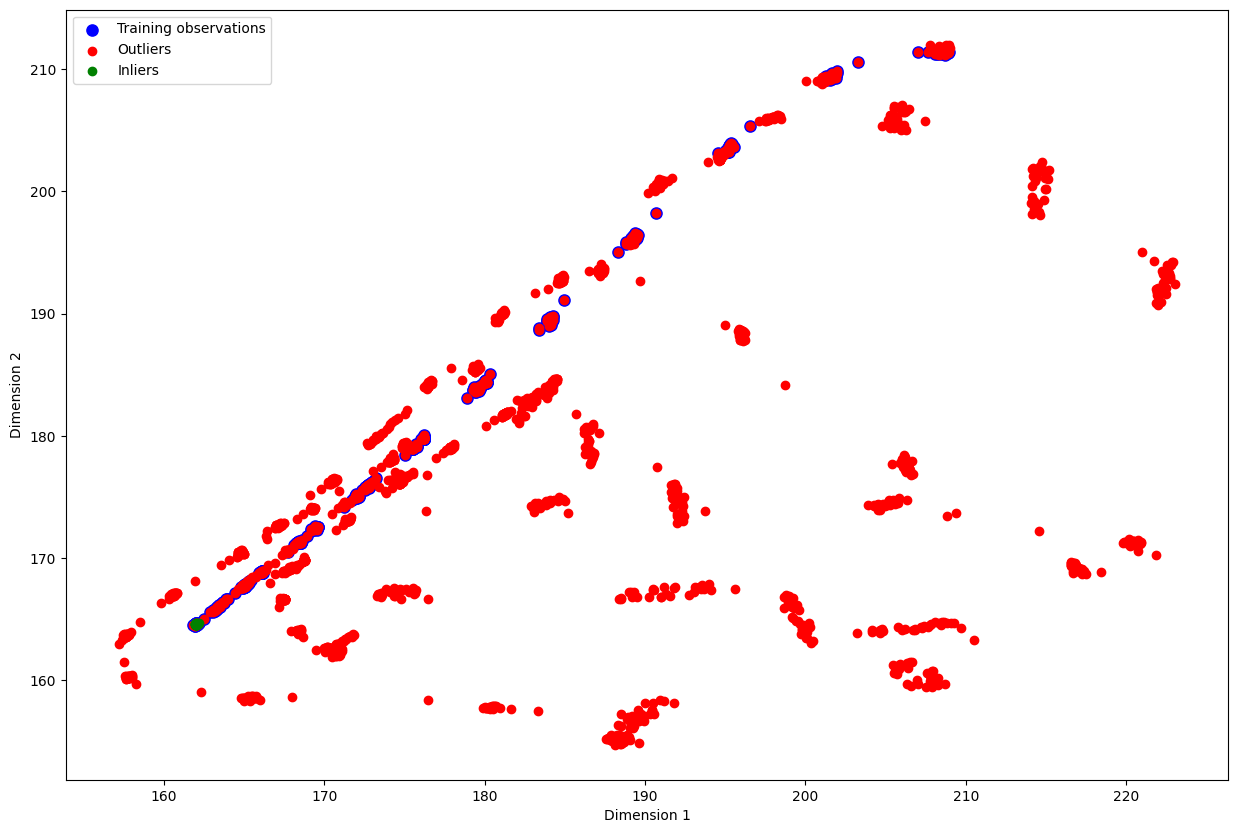

In [21]:
plt.figure(figsize=(15,10))
# filter outlier index
outlier_index = np.where(y_pred_outliers == -1)
# filter outlier values
outlier_values = dataset_final.iloc[outlier_index]

# filter inliers index
inliers_index = np.where(y_pred_test == 1)
# filter inliers values
inliers_values = dataset_final.iloc[inliers_index]

# plot data
a = plt.scatter(X_train[0], X_train[1], color = "b", s = 65)
# plot outlier values
b = plt.scatter(outlier_values[0], outlier_values[1], color = "r")
# plot inliers values
c = plt.scatter(inliers_values[0], inliers_values[1], color = "g")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.legend(
    [a, b, c],
    [
        "Training observations",
        "Outliers",
        "Inliers",
    ],
    loc="upper left",
)